# Part I - Prosper Loan Data Analysis
## by Doron Dusheiko

## Introduction
A dataset of 113,937 loans is provided by Prosper. Each loan has 81 variables including loan amount, borrower rate/interest rate, loan status, borrower income and many others. 

The goal of this analysis is to answer the following question: **What factors affect a loan's outcome status?**

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
print(loans.shape)

(113937, 81)


Given the large number of columns, I'll review the dataset by data type first to make it more manageable.

In [4]:
loans.dtypes.value_counts()

float64    50
object     17
int64      11
bool        3
dtype: int64

In [5]:
loans.dtypes[loans.dtypes == 'object']

ListingKey                 object
ListingCreationDate        object
CreditGrade                object
LoanStatus                 object
ClosedDate                 object
ProsperRating (Alpha)      object
BorrowerState              object
Occupation                 object
EmploymentStatus           object
GroupKey                   object
DateCreditPulled           object
FirstRecordedCreditLine    object
IncomeRange                object
LoanKey                    object
LoanOriginationDate        object
LoanOriginationQuarter     object
MemberKey                  object
dtype: object

In [6]:
loans[loans.columns[loans.dtypes == 'object']].sample(20)

,ListingKey,ListingCreationDate,CreditGrade,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
73598,3EAE360203793201672E3A4,2014-02-13 17:09:40.527000000,NaN,Current,NaN,HR,OR,Other,Employed,NaN,2014-02-13 17:09:42,1998-07-10 00:00:00,"$25,000-49,999",A9493707002632449A9AF4E,2014-02-18 00:00:00,Q1 2014,D39D37054341740348995AC
78643,487A33651211526876C9184,2006-06-03 15:22:37.783000000,AA,Completed,2009-06-20 00:00:00,NaN,NaN,NaN,NaN,NaN,2006-06-03 15:18:17.867000000,1983-01-01 00:00:00,Not displayed,FA6E336583772961278E4D0,2006-06-20 00:00:00,Q2 2006,3B2333650146820396F9C12
52098,ED933425602680101453E26,2008-06-29 18:38:00.703000000,AA,Chargedoff,2010-09-07 00:00:00,NaN,VA,Nurse (RN),Full-time,NaN,2008-06-19 05:49:33.850000000,1990-09-26 00:00:00,"$50,000-74,999",961634253034680799DC17F,2008-07-08 00:00:00,Q3 2008,6EDB3423102010071C4D097
6960,6EE133944942008658EEB91,2007-07-12 20:19:55.397000000,B,Completed,2010-07-31 00:00:00,NaN,MI,Analyst,Full-time,NaN,2007-07-12 20:05:12.780000000,1995-05-28 00:00:00,"$50,000-74,999",EFC6339468732598723C813,2007-07-31 00:00:00,Q3 2007,2ECB3376143771571DD9096
72353,417634160922749802D2719,2008-03-15 16:13:01.790000000,E,Completed,2010-12-21 00:00:00,NaN,OR,Professional,Self-employed,NaN,2008-03-04 20:57:40.557000000,1988-06-26 00:00:00,"$50,000-74,999",38873415648546395903BB8,2008-03-24 00:00:00,Q1 2008,65013414698838054066D8A
77982,6BBF3599922840405D5EF24,2014-01-04 13:57:12.127000000,NaN,Current,NaN,C,UT,Other,Self-employed,NaN,2014-01-04 13:57:14,1994-10-11 00:00:00,"$25,000-49,999",AC9D370195605679246D734,2014-01-07 00:00:00,Q1 2014,60373703047086858CC3382
88810,ECE03596570832207B8DFE5,2013-12-09 13:22:39.710000000,NaN,Current,NaN,B,WI,NaN,Other,NaN,2013-12-09 13:22:42,1987-04-01 00:00:00,"$1-24,999",1ECE3705307343860DF904B,2014-02-04 00:00:00,Q1 2014,648936994523226262FEFB3
5491,6CE13537557413781975CE8,2012-02-01 11:09:08.353000000,NaN,Completed,2013-01-08 00:00:00,AA,TX,Nurse (RN),Employed,NaN,2012-01-14 06:04:14,1987-03-02 00:00:00,"$75,000-99,999",92033643414915754F3579E,2012-02-14 00:00:00,Q1 2012,620235374925402367F43FC
47569,92F235519800385070BB9ED,2012-07-02 06:20:37.103000000,NaN,Current,NaN,B,IN,Other,Employed,NaN,2012-07-02 06:20:35,1984-04-02 00:00:00,"$75,000-99,999",3B2236549764755536EF998,2012-07-06 00:00:00,Q3 2012,5F17352719559195713FFE4
64154,82953504891767528A3AAC9,2011-01-17 16:39:56.843000000,NaN,Chargedoff,2014-01-29 00:00:00,C,NH,Professional,Employed,NaN,2011-04-26 10:16:18,1995-07-18 00:00:00,"$50,000-74,999",8E0236174226343265199A3,2011-04-29 00:00:00,Q2 2011,47D034151065300438F8970


In [7]:
loans[loans.columns[loans.dtypes == 'object']].isnull().sum()

ListingKey                      0
ListingCreationDate             0
CreditGrade                 84984
LoanStatus                      0
ClosedDate                  58848
ProsperRating (Alpha)       29084
BorrowerState                5515
Occupation                   3588
EmploymentStatus             2255
GroupKey                   100596
DateCreditPulled                0
FirstRecordedCreditLine       697
IncomeRange                     0
LoanKey                         0
LoanOriginationDate             0
LoanOriginationQuarter          0
MemberKey                       0
dtype: int64

In [8]:
loans.dtypes[loans.dtypes == 'int64']

ListingNumber                 int64
Term                          int64
ListingCategory (numeric)     int64
OpenRevolvingAccounts         int64
LoanCurrentDaysDelinquent     int64
LoanMonthsSinceOrigination    int64
LoanNumber                    int64
LoanOriginalAmount            int64
Recommendations               int64
InvestmentFromFriendsCount    int64
Investors                     int64
dtype: object

In [9]:
loans[loans.columns[loans.dtypes == 'int64']].sample(20)

,ListingNumber,Term,ListingCategory (numeric),OpenRevolvingAccounts,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,Recommendations,InvestmentFromFriendsCount,Investors
86566,910465,36,2,3,0,6,103014,4000,0,0,1
75476,1150383,36,1,10,0,2,128551,15000,0,0,134
51584,989828,36,1,3,0,4,110164,7000,0,0,1
98491,559264,36,1,5,0,25,60780,12600,0,0,4
61992,60528,36,0,0,157,88,4816,3500,0,0,36
103777,595173,36,2,10,0,21,67931,9000,0,0,187
103092,1171427,36,3,10,0,2,129737,15000,0,0,4
23398,551364,60,3,7,0,26,59195,15000,0,0,2
47545,140055,36,0,6,1745,82,15454,4500,0,0,70
31069,457610,36,1,3,0,46,42555,13200,0,0,351


In [10]:
loans[loans.columns[loans.dtypes == 'int64']].isnull().sum()

ListingNumber                 0
Term                          0
ListingCategory (numeric)     0
OpenRevolvingAccounts         0
LoanCurrentDaysDelinquent     0
LoanMonthsSinceOrigination    0
LoanNumber                    0
LoanOriginalAmount            0
Recommendations               0
InvestmentFromFriendsCount    0
Investors                     0
dtype: int64

In [11]:
loans.dtypes[loans.dtypes == 'float64']

BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperScore                           float64
EmploymentStatusDuration               float64
CreditScoreRangeLower                  float64
CreditScoreRangeUpper                  float64
CurrentCreditLines                     float64
OpenCreditLines                        float64
TotalCreditLinespast7years             float64
OpenRevolvingMonthlyPayment            float64
InquiriesLast6Months                   float64
TotalInquiries                         float64
CurrentDelinquencies                   float64
AmountDelinquent                       float64
DelinquenciesLast7Years                float64
PublicRecordsLast10Years               float64
PublicRecords

In [12]:
loans[loans.columns[loans.dtypes == 'float64']].sample(20)

,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,EmploymentStatusDuration,CreditScoreRangeLower,...,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,InvestmentFromFriendsAmount
100845,0.29254,0.2574,0.2474,0.24130,0.1050,0.13630,3.0,4.0,73.0,640.0,...,7532.5600,4713.07,2819.4900,-108.69,0.00,0.00,0.00,0.0,1.0,0.0
22668,0.15428,0.1400,0.1300,NaN,NaN,NaN,NaN,NaN,69.0,680.0,...,5976.8900,4818.78,1158.1100,-80.57,0.00,0.00,0.00,0.0,1.0,0.0
91583,0.18990,0.1535,0.1435,0.13507,0.0599,0.07517,5.0,6.0,13.0,640.0,...,696.7400,451.18,245.5600,-15.99,0.00,0.00,0.00,0.0,1.0,0.0
61431,0.20735,0.2000,0.1900,NaN,NaN,NaN,NaN,NaN,56.0,640.0,...,1449.3600,832.36,617.0000,-30.85,0.00,5667.64,5667.64,0.0,1.0,0.0
31278,0.19144,0.1550,0.1450,0.13705,0.0549,0.08215,5.0,7.0,70.0,680.0,...,1564.6101,998.05,566.5601,-36.97,0.00,0.00,0.00,0.0,1.0,0.0
84444,0.15651,0.1350,0.1250,NaN,NaN,NaN,NaN,NaN,81.0,660.0,...,407.2800,289.70,117.5800,-8.71,0.00,710.30,710.30,0.0,1.0,0.0
95869,0.28032,0.2419,0.2319,0.21260,0.1075,0.10510,3.0,3.0,183.0,660.0,...,1243.6400,637.95,605.6900,-25.05,0.00,0.00,0.00,0.0,1.0,0.0
24757,0.23530,0.1979,0.1879,0.17490,0.0774,0.09750,4.0,4.0,11.0,680.0,...,3882.8171,2252.43,1630.3871,-82.80,0.00,0.00,0.00,0.0,1.0,0.0
79112,0.17869,0.1569,0.1469,NaN,NaN,NaN,NaN,NaN,79.0,620.0,...,6464.6200,5000.26,1464.3600,-87.75,-89.26,0.00,0.00,0.0,1.0,0.0
61934,0.20053,0.1639,0.1539,0.14520,0.0574,0.08780,5.0,6.0,149.0,660.0,...,883.7500,555.44,328.3100,-20.03,0.00,0.00,0.00,0.0,1.0,0.0


In [13]:
loans[loans.columns[loans.dtypes == 'float64']].isnull().sum()

BorrowerAPR                               25
BorrowerRate                               0
LenderYield                                0
EstimatedEffectiveYield                29084
EstimatedLoss                          29084
EstimatedReturn                        29084
ProsperRating (numeric)                29084
ProsperScore                           29084
EmploymentStatusDuration                7625
CreditScoreRangeLower                    591
CreditScoreRangeUpper                    591
CurrentCreditLines                      7604
OpenCreditLines                         7604
TotalCreditLinespast7years               697
OpenRevolvingMonthlyPayment                0
InquiriesLast6Months                     697
TotalInquiries                          1159
CurrentDelinquencies                     697
AmountDelinquent                        7622
DelinquenciesLast7Years                  990
PublicRecordsLast10Years                 697
PublicRecordsLast12Months               7604
RevolvingC

In [14]:
loans[~loans.BorrowerAPR.isna()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [15]:
loans.dtypes[loans.dtypes == 'bool']

IsBorrowerHomeowner    bool
CurrentlyInGroup       bool
IncomeVerifiable       bool
dtype: object

In [16]:
loans[loans.columns[loans.dtypes == 'bool']].sample(20)

,IsBorrowerHomeowner,CurrentlyInGroup,IncomeVerifiable
101581,False,False,False
101805,True,False,True
37259,True,False,True
17118,False,False,False
113784,True,False,True
88371,True,False,True
59764,False,False,True
107923,True,False,True
73221,False,False,True
18807,False,False,True


In [17]:
loans[loans.columns[loans.dtypes == 'bool']].isnull().sum()

IsBorrowerHomeowner    0
CurrentlyInGroup       0
IncomeVerifiable       0
dtype: int64

### What is the structure of your dataset?

There are 113937 loans in the dataset with 81 features. Most variables are numeric, however `CreditGrade`, `ProsperRating (Alpha)` and `IncomeRange` are ordinal while `LoanStatus`, `Occupation` and `EmploymentStatus` are nominal categorical variables. `CreditGrade` is the rating of the customer pre-July 2099 and `ProsperRating (Alpha)` (along with `PropserRating (numeric)` and `ProsperScore`) is the rating post-July 2009.    

### What is/are the main feature(s) of interest in your dataset?

I'm primarily interested in the predicting what features contribute to the loan outcome status.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I'm expecting the following variables to be the main contributors to the LoanStatus: 
- CreditGrade
- Term
- BorrowerRate
- ProsperRating (numeric)
- ProsperRating (Alpha)
- ProsperScore
- ListingCategory
- Occupation
- EmploymentStatus
- IsBorrowerHomeowner
- CreditScoreRangeLower
- CreditScoreRangeUpper
- CurrentCreditLines
- TotalCreditLinespast7years
- OpenRevolvingAccounts
- OpenRevolvingMonthlyPayment
- InquiriesLast6Months
- CurrentDelinquencies
- DelinquenciesLast7Years
- PublicRecordsLast12Months
- RevolvingCreditBalance
- DebtToIncomeRatio
- IncomeRange
- LoanOriginalAmount
- LoanMonthsSinceOrigination


To simplify the analysis, I will create a dataset with only the above mentioned fields and then convert the data types as needed

In [18]:
df = loans[['LoanOriginalAmount', 'LoanStatus', 'IncomeRange', 'CreditGrade', 'LoanMonthsSinceOrigination', 'Term','BorrowerRate','ProsperRating (numeric)','ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)','Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', \
            'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'CurrentDelinquencies', 'DelinquenciesLast7Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'DebtToIncomeRatio']]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanOriginalAmount           113937 non-null  int64  
 1   LoanStatus                   113937 non-null  object 
 2   IncomeRange                  113937 non-null  object 
 3   CreditGrade                  28953 non-null   object 
 4   LoanMonthsSinceOrigination   113937 non-null  int64  
 5   Term                         113937 non-null  int64  
 6   BorrowerRate                 113937 non-null  float64
 7   ProsperRating (numeric)      84853 non-null   float64
 8   ProsperRating (Alpha)        84853 non-null   object 
 9   ProsperScore                 84853 non-null   float64
 10  ListingCategory (numeric)    113937 non-null  int64  
 11  Occupation                   110349 non-null  object 
 12  EmploymentStatus             111682 non-null  object 
 13 

In [20]:
# renaming columns to make them easier to work with
df.rename(columns={'ProsperRating (numeric)': 'ProsperRatingNumeric', 'ProsperRating (Alpha)': 'ProsperRatingAlpha', 'ListingCategory (numeric)':'ListingCategoryNumeric'}, inplace=True)

# convert income range, credit grade and prosper rating alpha into ordered categorical types
ordinal_var_dict = {'IncomeRange': ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                    'CreditGrade': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperRatingAlpha': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']}


for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)
    
# convert loan status, listing category, occupation, employment status into nominal categorical variables
nominal_vars = ['LoanStatus', 'IncomeRange', 'ListingCategoryNumeric', 'Occupation', 'EmploymentStatus']
df[nominal_vars] = df[nominal_vars].astype('category')

C:\CondaEnvs\ds\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\DOROND~1\AppData\Local\Temp/ipykernel_11664/2634241494.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = df[var].astype(ordered_var)
C:\CondaEnvs\ds\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   LoanOriginalAmount           113937 non-null  int64   
 1   LoanStatus                   113937 non-null  category
 2   IncomeRange                  113937 non-null  category
 3   CreditGrade                  28953 non-null   category
 4   LoanMonthsSinceOrigination   113937 non-null  int64   
 5   Term                         113937 non-null  int64   
 6   BorrowerRate                 113937 non-null  float64 
 7   ProsperRatingNumeric         84853 non-null   float64 
 8   ProsperRatingAlpha           84853 non-null   category
 9   ProsperScore                 84853 non-null   float64 
 10  ListingCategoryNumeric       113937 non-null  category
 11  Occupation                   110349 non-null  category
 12  EmploymentStatus             111682 non-null

In [22]:
df.describe()

,LoanOriginalAmount,LoanMonthsSinceOrigination,Term,BorrowerRate,ProsperRatingNumeric,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,CurrentDelinquencies,DelinquenciesLast7Years,PublicRecordsLast12Months,RevolvingCreditBalance,DebtToIncomeRatio
count,113937.00000,113937.000000,113937.000000,113937.000000,84853.000000,84853.000000,113346.000000,113346.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,113240.000000,112947.000000,106333.000000,1.063330e+05,105383.000000
mean,8337.01385,31.896882,40.830248,0.192764,4.072243,5.950067,685.567731,704.567731,10.317192,26.754539,6.96979,398.292161,1.435085,0.592052,4.154984,0.015094,1.759871e+04,0.275947
std,6245.80058,29.974184,10.436212,0.074818,1.673227,2.376501,66.458275,66.458275,5.457866,13.637871,4.63097,447.159711,2.437507,1.978707,10.160216,0.154092,3.293640e+04,0.551759
min,1000.00000,0.000000,12.000000,0.000000,1.000000,1.000000,0.000000,19.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,4000.00000,6.000000,36.000000,0.134000,3.000000,4.000000,660.000000,679.000000,7.000000,17.000000,4.00000,114.000000,0.000000,0.000000,0.000000,0.000000,3.121000e+03,0.140000
50%,6500.00000,21.000000,36.000000,0.184000,4.000000,6.000000,680.000000,699.000000,10.000000,25.000000,6.00000,271.000000,1.000000,0.000000,0.000000,0.000000,8.549000e+03,0.220000
75%,12000.00000,65.000000,36.000000,0.250000,5.000000,8.000000,720.000000,739.000000,13.000000,35.000000,9.00000,525.000000,2.000000,0.000000,3.000000,0.000000,1.952100e+04,0.320000
max,35000.00000,100.000000,60.000000,0.497500,7.000000,11.000000,880.000000,899.000000,59.000000,136.000000,51.00000,14985.000000,105.000000,83.000000,99.000000,20.000000,1.435667e+06,10.010000


## Univariate Exploration


I'll start by looking at the distribution of the main variable of interest: loan status

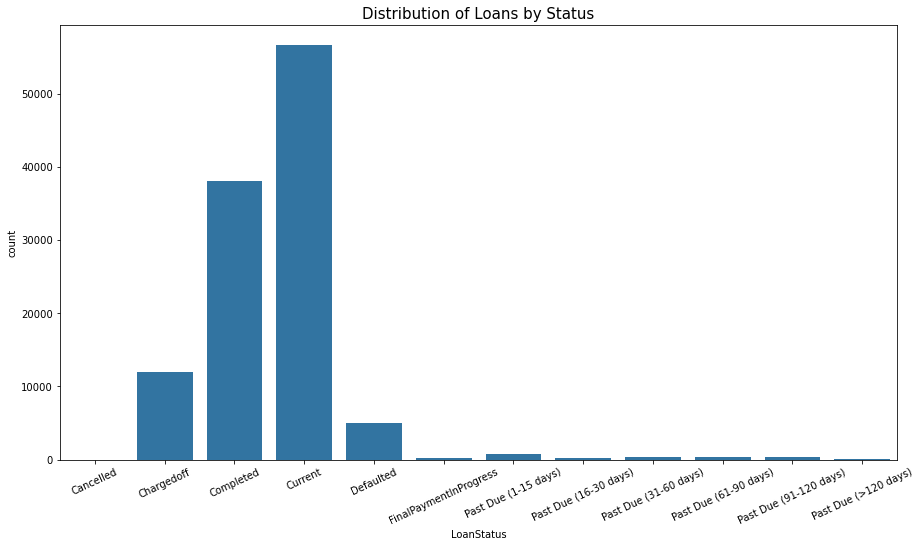

In [23]:
# plot the distribution of loans by status
plt.figure(figsize=(15, 8))
default_color = sb.color_palette()[0]
ax = sb.countplot(data=df, x="LoanStatus", color=default_color)
plt.title("Distribution of Loans by Status", fontsize=15)
plt.xticks(rotation=25);

The majority of loans are in Current or Completed, with ChargedOff and Defaulted being the next major statuses. 

Lets now look at the distribution of Loan Amount

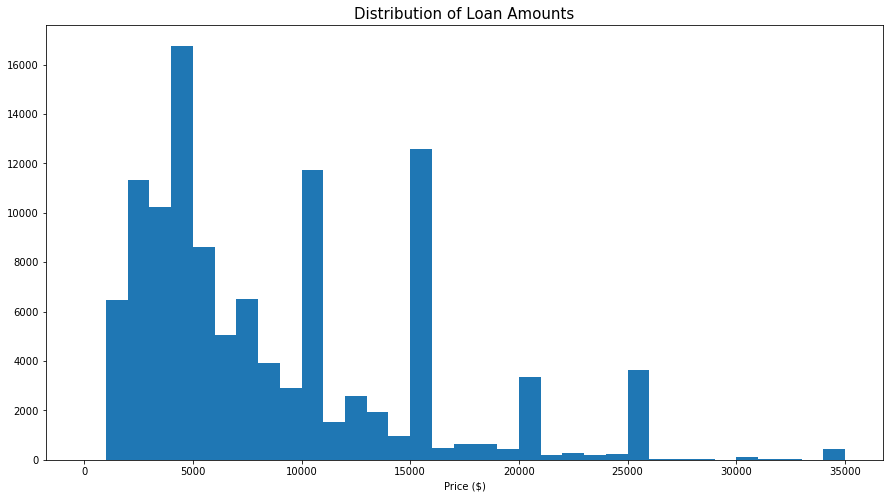

In [24]:
# start with a standard-scaled plot
binsize = 1000
bins = np.arange(0, df['LoanOriginalAmount'].max()+binsize, binsize)
plt.figure(figsize=[15, 8])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Price ($)')
plt.title("Distribution of Loan Amounts", fontsize=15)
plt.show()

We can see spikes around each multiple of 5K, these are probably standard loan offerings. The distribution is also right-skewed, meaning there are some outliers. 

Let's investigate the distribution of income ranges

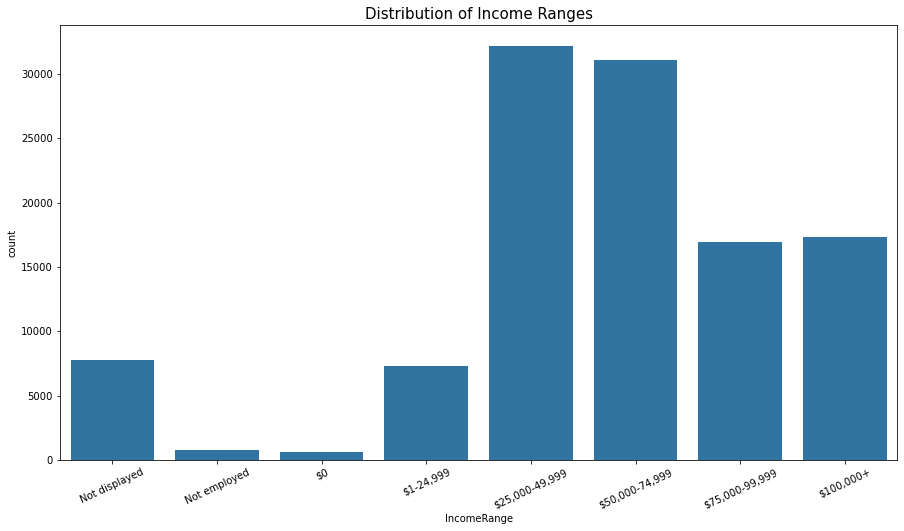

In [25]:
# plot the distribution of income ranges
plt.figure(figsize=(15, 8))
default_color = sb.color_palette()[0]
ax = sb.countplot(data=df, x="IncomeRange", color=default_color)
plt.title("Distribution of Income Ranges", fontsize=15)
plt.xticks(rotation=25);

Most loans are are for individuals earning between \\$25,000 - \\$49,999, followed by \\$50,000 - \\$74,999

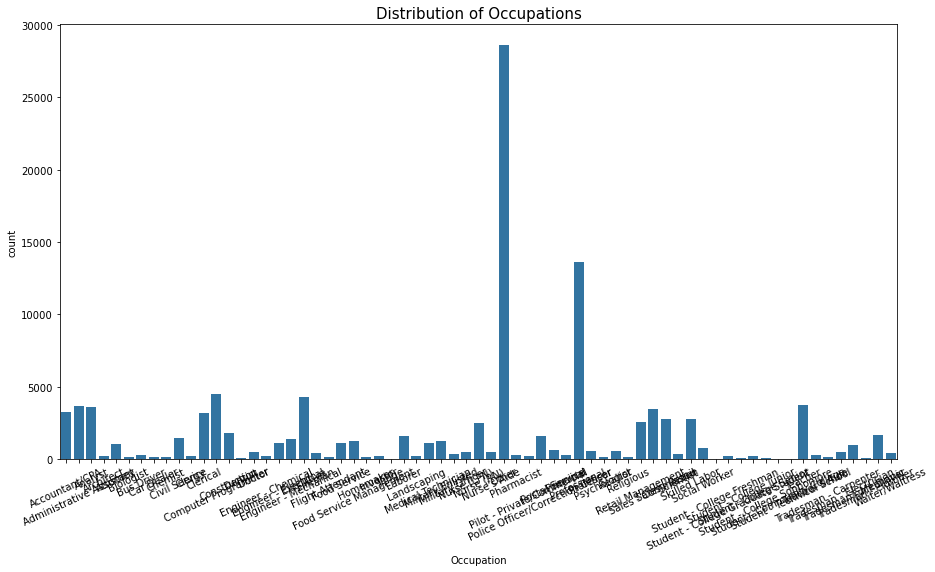

In [26]:
# plot the distribution of occupations
plt.figure(figsize=(15, 8))
default_color = sb.color_palette()[0]
ax = sb.countplot(data=df, x="Occupation", color=default_color)
plt.title("Distribution of Occupations", fontsize=15)
plt.xticks(rotation=25);

We can't clearly see the occupation breakdown, but its clear there are some highly common occupations,  let see what the top 10 professions are

<AxesSubplot:title={'center':'Top 10 Professions'}>

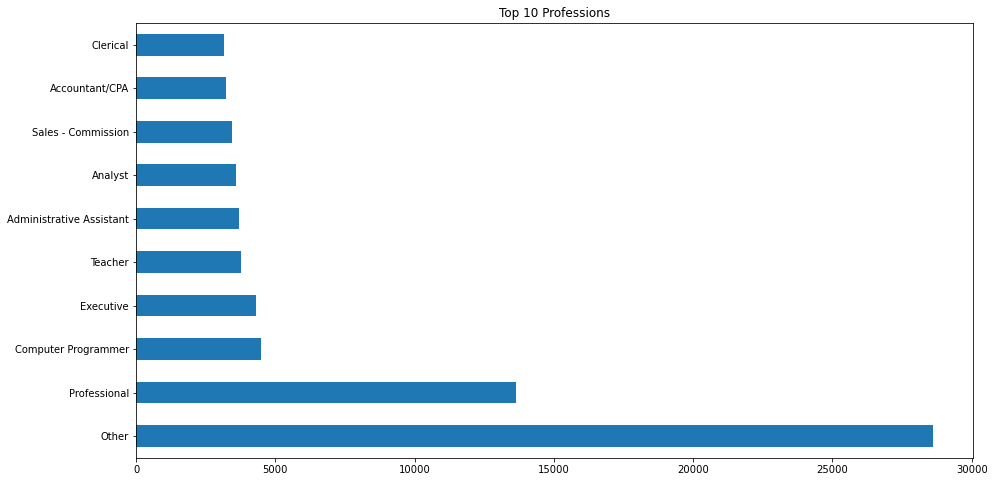

In [27]:
df.Occupation.value_counts().sort_values(ascending=False)[:10].plot.barh(figsize=(15,8), title="Top 10 Professions")

Let's check the bottom 10 professions

<AxesSubplot:title={'center':'Bottom 10 Professions'}>

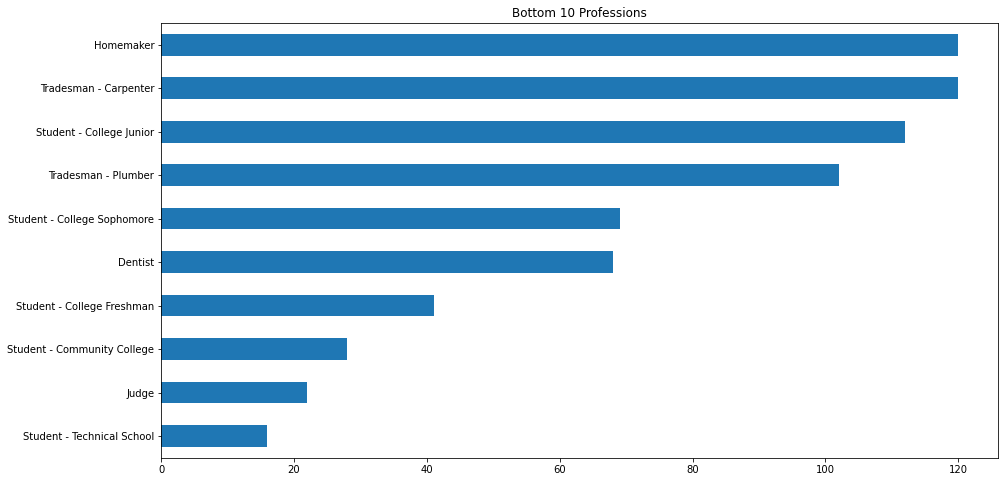

In [28]:
df.Occupation.value_counts().sort_values(ascending=True)[:10].plot.barh(figsize=(15,8), title="Bottom 10 Professions")

Other and Professional are the most common, which are likely just "catch-all" categories, this doesnt give us much info. Interestingly though, Computer Programmers are the most common "non-generic" listed profession. Most types of students form the bottom 10 listed professions, as one might expect. 

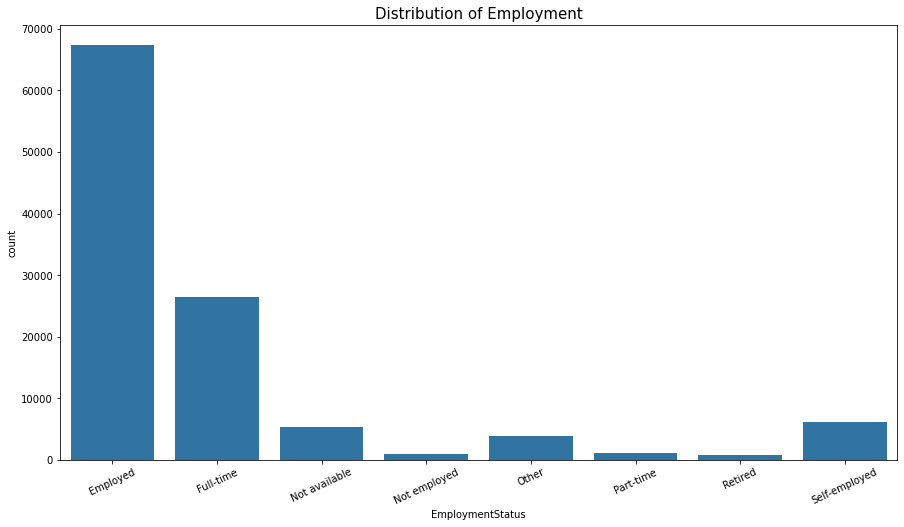

In [29]:
# plot the distribution of employment statuses
plt.figure(figsize=(15, 8))
default_color = sb.color_palette()[0]
ax = sb.countplot(data=df, x="EmploymentStatus", color=default_color)
plt.title("Distribution of Employment", fontsize=15)
plt.xticks(rotation=25);

Most people are employed and probably are full-time employed.

I'm interested to see how the credit ratings are distributed pre and post July 2009 when the rating system changed

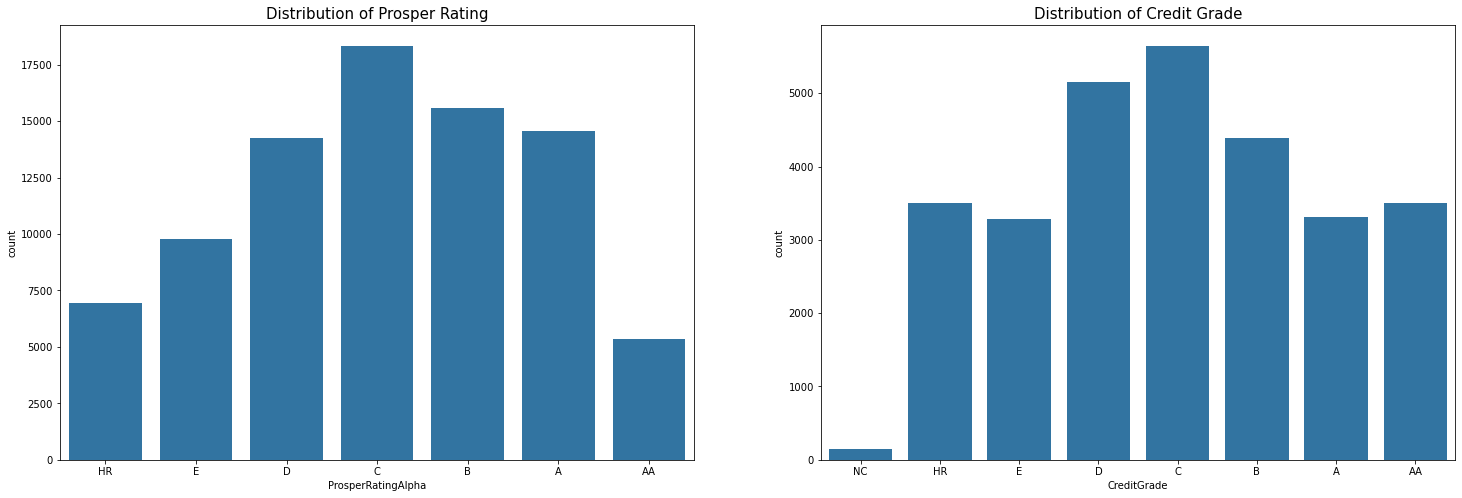

In [30]:
# plot the distribution of loans by status
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1) 
default_color = sb.color_palette()[0]
ax = sb.countplot(data=df, x="ProsperRatingAlpha", color=default_color)
plt.title("Distribution of Prosper Rating", fontsize=15)

plt.subplot(1, 2, 2) 
default_color = sb.color_palette()[0]
ax = sb.countplot(data=df, x="CreditGrade", color=default_color)
plt.title("Distribution of Credit Grade", fontsize=15);

Looks like C was the most common rating pre and post July 2009, however there is a shift between D and B scores between both periods. Its not clear though what that means since we don't know what goes into the credit decision score itself.

I'd like to see the distributions of the remaining numerical variables in one visual. 

In [31]:
numerical_features = df.select_dtypes(include=np.number).columns.values

C:\CondaEnvs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


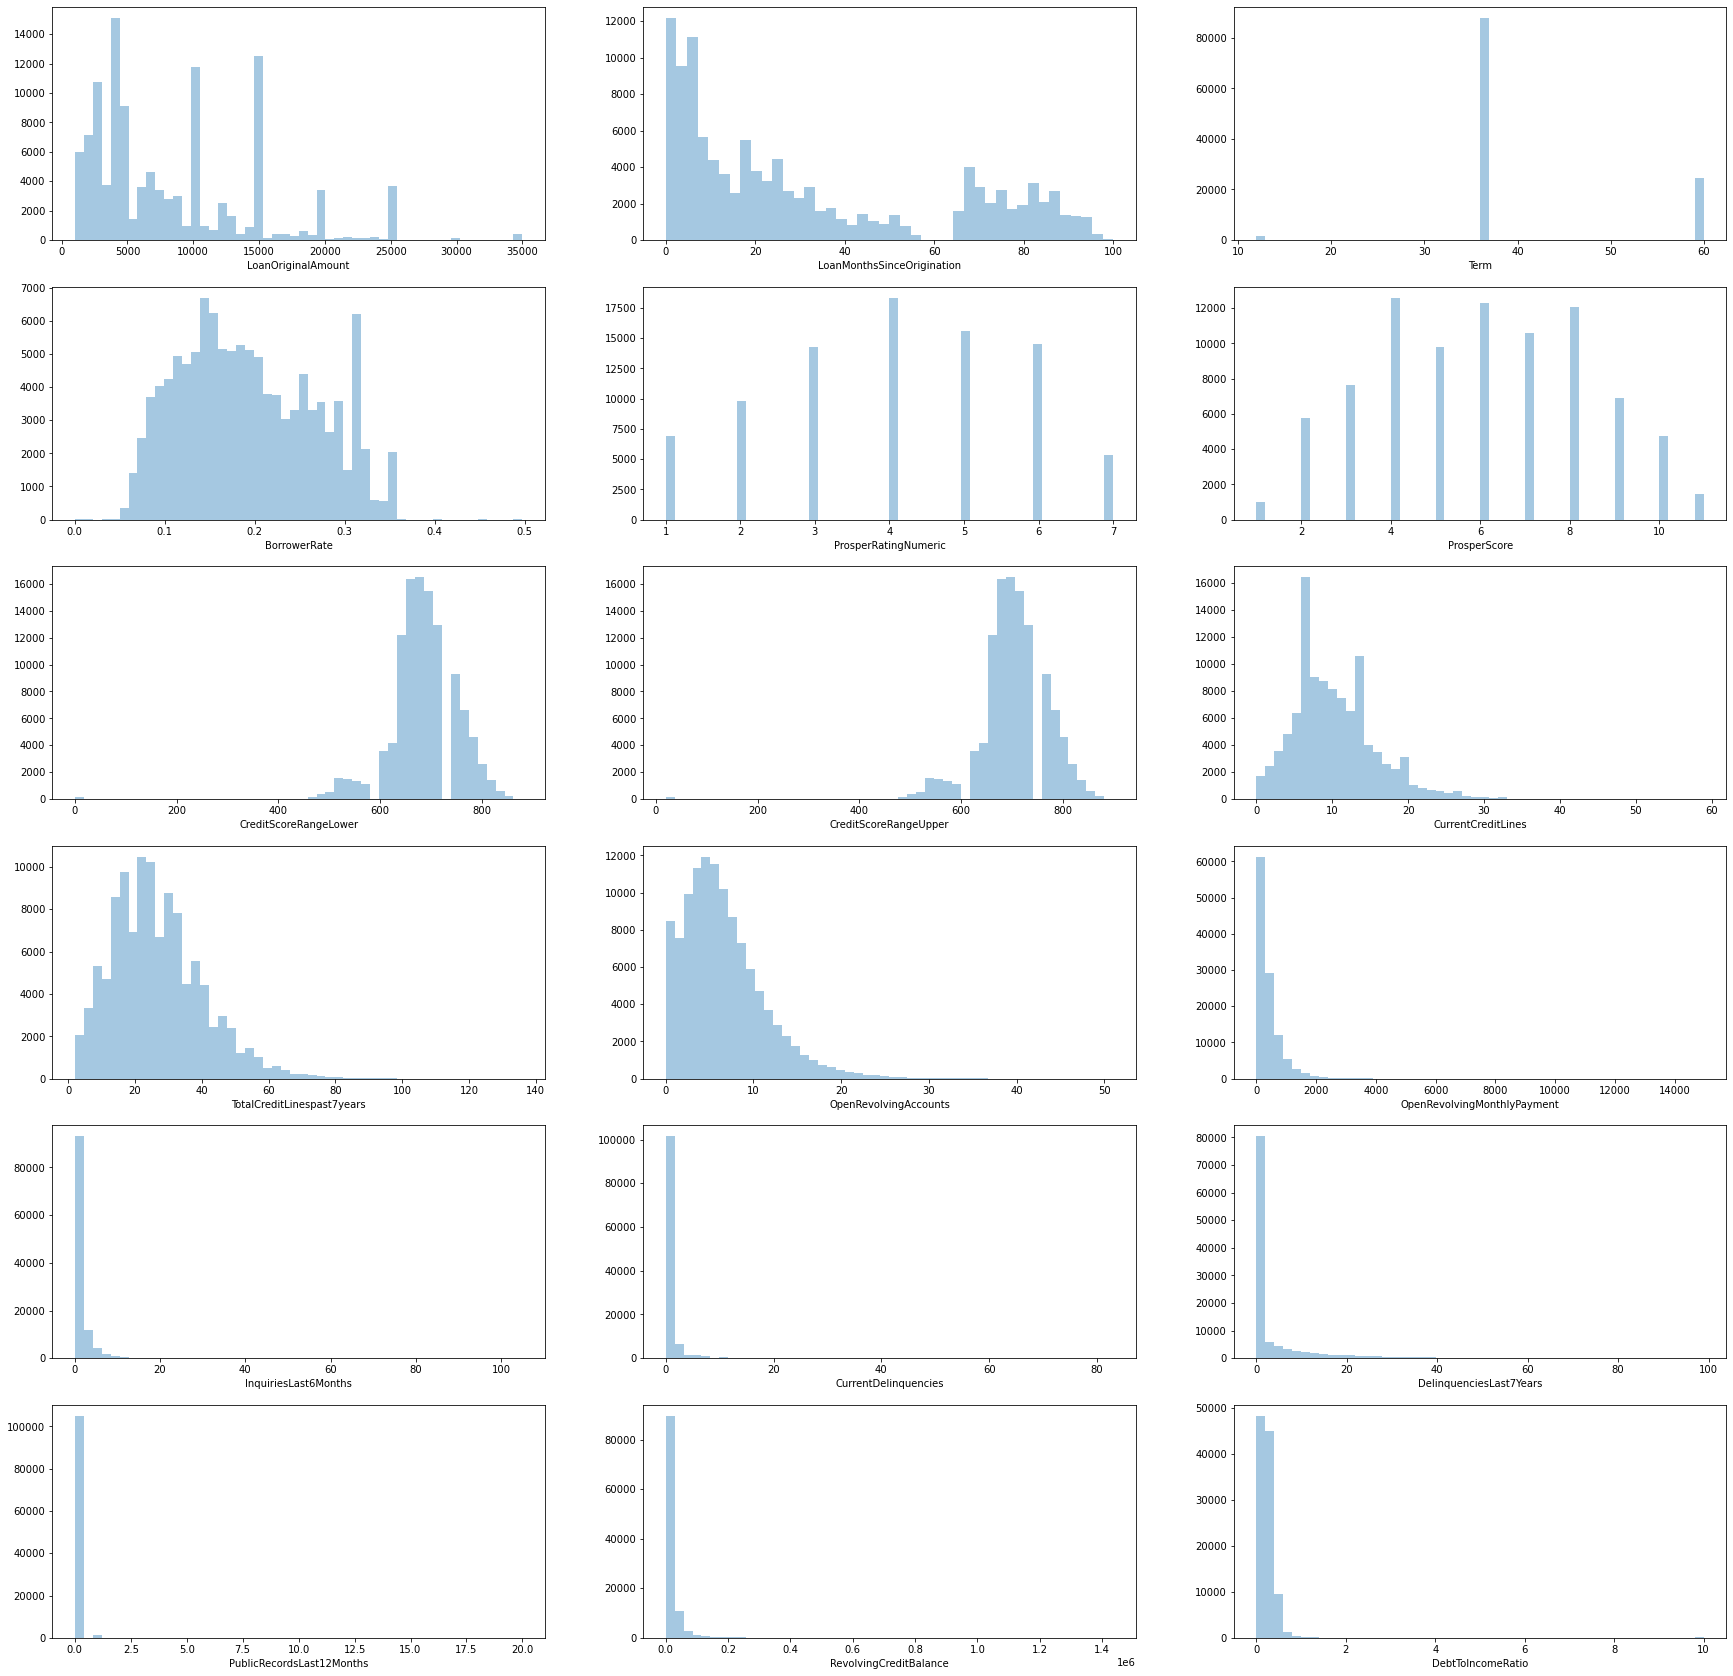

In [32]:
# plot distributions of numerical features to get high-level feel
plt.figure(figsize=(30,30))
for index, col in enumerate(numerical_features):
    plt.subplot(6, 3, index+1)
    sb.distplot(df[col], kde=False);

I'd like to peek into the loan term a bit more

In [33]:
df.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

Loan terms seem to be offered in 3 values - 12, 36 or 60 months, which 36 months being most common.

Let's study the Borrower Rate further

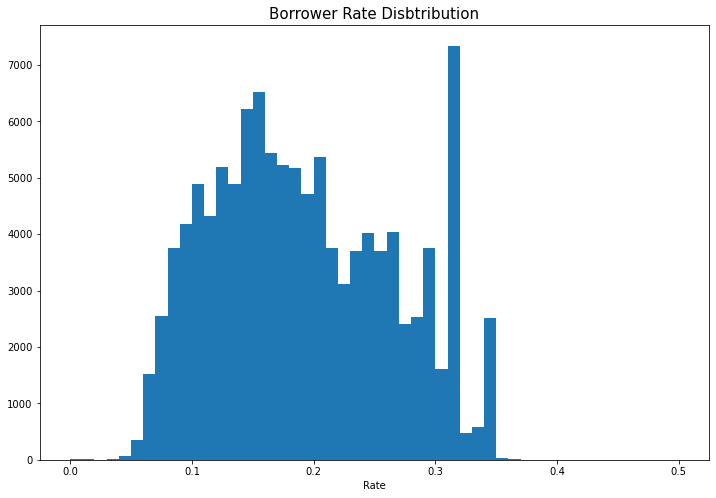

In [34]:
# start with a standard-scaled plot
binsize = 0.01
bins = np.arange(0, df['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[12, 8])
plt.hist(data = df, x = 'BorrowerRate', bins=bins)
plt.xlabel('Rate')
plt.title("Borrower Rate Disbtribution", fontsize=15);
plt.show()

In [35]:
df['BorrowerRate'].value_counts().sort_values(ascending=False)

0.3177    3672
0.3500    1905
0.3199    1651
0.2900    1508
0.2699    1319
          ... 
0.1526       1
0.2960       1
0.0627       1
0.3478       1
0.0739       1
Name: BorrowerRate, Length: 2294, dtype: int64

Although most offered rates are between 0.1 and 0.2, there is a large spike at 0.3177. We should keep this in mind when doing bivariate or multivariate analysis.

Additional insights:
- Prosper Rating and Score of 4 is most common. Prosper score of 6 and 8 is also quite common.
- Most people do not have any delinquincies, revolving credit monthly payments, public records or inquiries in the last 6 months. 

Many of the variables above seem to have outliers, based on the heavily right-skewed distribution. Let's see if we can study them

In [36]:
cols = ['OpenRevolvingMonthlyPayment','InquiriesLast6Months','CurrentDelinquencies','DelinquenciesLast7Years','PublicRecordsLast12Months','RevolvingCreditBalance', 'DebtToIncomeRatio']
df[cols].describe()

,OpenRevolvingMonthlyPayment,InquiriesLast6Months,CurrentDelinquencies,DelinquenciesLast7Years,PublicRecordsLast12Months,RevolvingCreditBalance,DebtToIncomeRatio
count,113937.000000,113240.000000,113240.000000,112947.000000,106333.000000,1.063330e+05,105383.000000
mean,398.292161,1.435085,0.592052,4.154984,0.015094,1.759871e+04,0.275947
std,447.159711,2.437507,1.978707,10.160216,0.154092,3.293640e+04,0.551759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,114.000000,0.000000,0.000000,0.000000,0.000000,3.121000e+03,0.140000
50%,271.000000,1.000000,0.000000,0.000000,0.000000,8.549000e+03,0.220000
75%,525.000000,2.000000,0.000000,3.000000,0.000000,1.952100e+04,0.320000
max,14985.000000,105.000000,83.000000,99.000000,20.000000,1.435667e+06,10.010000


In [37]:
high_outliers = (df['OpenRevolvingMonthlyPayment'] > 6000) | (df['InquiriesLast6Months'] > 20) | (df['CurrentDelinquencies'] > 40) | (df['DelinquenciesLast7Years'] > 40) | (df['PublicRecordsLast12Months'] > 3) \
| (df['RevolvingCreditBalance'] > 100000) | (df['DebtToIncomeRatio'] > 3)
print(high_outliers.sum())
df.loc[high_outliers, :]

4905


,LoanOriginalAmount,LoanStatus,IncomeRange,CreditGrade,LoanMonthsSinceOrigination,Term,BorrowerRate,ProsperRatingNumeric,ProsperRatingAlpha,ProsperScore,...,CurrentCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,CurrentDelinquencies,DelinquenciesLast7Years,PublicRecordsLast12Months,RevolvingCreditBalance,DebtToIncomeRatio
22,4000,Current,"$1-24,999",NaN,13,36,0.3134,1.0,HR,2.0,...,9.0,18.0,8,617.0,0.0,0.0,0.0,0.0,10050.0,9.20
32,25000,Current,"$75,000-99,999",NaN,2,36,0.1274,5.0,B,8.0,...,9.0,30.0,7,610.0,0.0,0.0,51.0,0.0,25224.0,0.22
36,10000,Current,"$100,000+",NaN,3,36,0.2850,2.0,E,2.0,...,12.0,34.0,10,757.0,3.0,0.0,12.0,0.0,103263.0,0.14
37,5000,Current,"$25,000-49,999",NaN,6,36,0.2469,3.0,D,6.0,...,10.0,47.0,6,248.0,0.0,0.0,52.0,0.0,8672.0,0.31
48,15000,Current,"$100,000+",NaN,7,60,0.1519,5.0,B,6.0,...,19.0,41.0,7,846.0,0.0,0.0,0.0,0.0,153812.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113804,5000,Completed,"$100,000+",D,73,36,0.2500,NaN,NaN,NaN,...,6.0,61.0,3,43.0,3.0,23.0,62.0,0.0,844.0,0.09
113853,3400,Completed,"$25,000-49,999",D,75,36,0.3397,NaN,NaN,NaN,...,5.0,16.0,5,70.0,2.0,2.0,42.0,0.0,597.0,0.07
113875,5000,Past Due (61-90 days),"$50,000-74,999",NaN,28,36,0.3149,2.0,E,4.0,...,15.0,46.0,11,162.0,0.0,6.0,41.0,0.0,4251.0,0.19
113878,3000,Completed,"$50,000-74,999",C,68,36,0.2600,NaN,NaN,NaN,...,21.0,54.0,18,1971.0,2.0,0.0,0.0,0.0,141157.0,0.48


Too much data to review, so lets look at each variable individually

In [38]:
high_outliers = (df['OpenRevolvingMonthlyPayment'] > 6000)
print(high_outliers.sum())
df.loc[high_outliers, :]

14


,LoanOriginalAmount,LoanStatus,IncomeRange,CreditGrade,LoanMonthsSinceOrigination,Term,BorrowerRate,ProsperRatingNumeric,ProsperRatingAlpha,ProsperScore,...,CurrentCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,CurrentDelinquencies,DelinquenciesLast7Years,PublicRecordsLast12Months,RevolvingCreditBalance,DebtToIncomeRatio
15626,15000,Defaulted,$0,A,78,36,0.2050,NaN,NaN,NaN,...,19.0,31.0,15,6616.0,1.0,0.0,0.0,0.0,431581.0,NaN
16741,12000,Chargedoff,"$100,000+",AA,70,36,0.1900,NaN,NaN,NaN,...,21.0,36.0,15,14985.0,7.0,0.0,0.0,1.0,192718.0,0.58
21631,20000,Completed,"$100,000+",A,74,36,0.1350,NaN,NaN,NaN,...,4.0,19.0,3,9085.0,0.0,0.0,0.0,0.0,24890.0,0.36
32026,15000,Current,"$100,000+",NaN,0,36,0.1920,4.0,C,7.0,...,29.0,57.0,18,7090.0,1.0,0.0,0.0,0.0,976426.0,0.47
39782,12000,Chargedoff,"$75,000-99,999",D,81,36,0.2156,NaN,NaN,NaN,...,17.0,37.0,11,6105.0,7.0,0.0,0.0,0.0,600223.0,1.32
40276,25000,Completed,"$100,000+",AA,70,36,0.1374,NaN,NaN,NaN,...,32.0,80.0,20,10977.0,2.0,0.0,0.0,0.0,1433328.0,0.08
44919,19000,Defaulted,"$100,000+",B,72,36,0.1910,NaN,NaN,NaN,...,18.0,40.0,16,8001.0,2.0,0.0,0.0,0.0,486503.0,0.35
58429,9222,Completed,"$100,000+",B,74,36,0.1790,NaN,NaN,NaN,...,17.0,44.0,16,6426.0,1.0,0.0,0.0,0.0,527602.0,0.41
62274,25000,Completed,"$100,000+",A,77,36,0.1654,NaN,NaN,NaN,...,17.0,36.0,18,12769.0,4.0,0.0,0.0,0.0,1435667.0,0.10
85534,13500,Current,"$50,000-74,999",NaN,13,60,0.1914,4.0,C,5.0,...,8.0,28.0,3,13765.0,0.0,0.0,0.0,0.0,31866.0,0.32


All of these have a very large number of open credit lines, indicating a lot of debt. In turn, they also have a large revolving credit balance as one might expect. Having said that, the data doesnt seem incorrect though; all but one come from pre July-2009, which might indicates that credit rules changed after that point and most of these people wouldnt receive credit under the new rules, but I can't confirm that. 

In [39]:
high_outliers = (df['InquiriesLast6Months'] > 20)
print(high_outliers.sum())
df.loc[high_outliers, :]

194


,LoanOriginalAmount,LoanStatus,IncomeRange,CreditGrade,LoanMonthsSinceOrigination,Term,BorrowerRate,ProsperRatingNumeric,ProsperRatingAlpha,ProsperScore,...,CurrentCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,CurrentDelinquencies,DelinquenciesLast7Years,PublicRecordsLast12Months,RevolvingCreditBalance,DebtToIncomeRatio
191,10000,Defaulted,Not displayed,D,88,36,0.3000,NaN,NaN,NaN,...,NaN,14.0,4,29.0,44.0,0.0,0.0,NaN,NaN,0.41
589,2550,Defaulted,"$25,000-49,999",D,84,36,0.1850,NaN,NaN,NaN,...,16.0,45.0,8,274.0,42.0,0.0,6.0,0.0,7161.0,0.46
721,1225,Defaulted,Not displayed,HR,85,36,0.2900,NaN,NaN,NaN,...,NaN,5.0,0,0.0,27.0,4.0,0.0,NaN,NaN,0.16
1324,1000,Completed,Not displayed,E,92,36,0.2300,NaN,NaN,NaN,...,NaN,74.0,5,54.0,21.0,0.0,0.0,NaN,NaN,0.20
1530,2500,Chargedoff,Not displayed,HR,89,36,0.2200,NaN,NaN,NaN,...,NaN,7.0,2,58.0,38.0,0.0,0.0,NaN,NaN,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111901,7500,Defaulted,"$75,000-99,999",C,84,36,0.2000,NaN,NaN,NaN,...,30.0,54.0,20,457.0,50.0,4.0,0.0,0.0,10552.0,0.28
111961,1200,Chargedoff,Not displayed,HR,88,36,0.2200,NaN,NaN,NaN,...,NaN,3.0,2,25.0,28.0,0.0,0.0,NaN,NaN,0.24
112401,4000,Chargedoff,"$25,000-49,999",D,75,36,0.2169,NaN,NaN,NaN,...,4.0,5.0,3,80.0,25.0,0.0,3.0,0.0,474.0,0.13
113621,6500,Chargedoff,"$50,000-74,999",B,83,36,0.2200,NaN,NaN,NaN,...,12.0,60.0,7,45.0,30.0,4.0,12.0,1.0,587.0,0.24


A large number of inquiries in the last 6 months might indicate the likelihood of a poor credit outcome. Lets take this group and plot them by Loan Status just to get a sense.

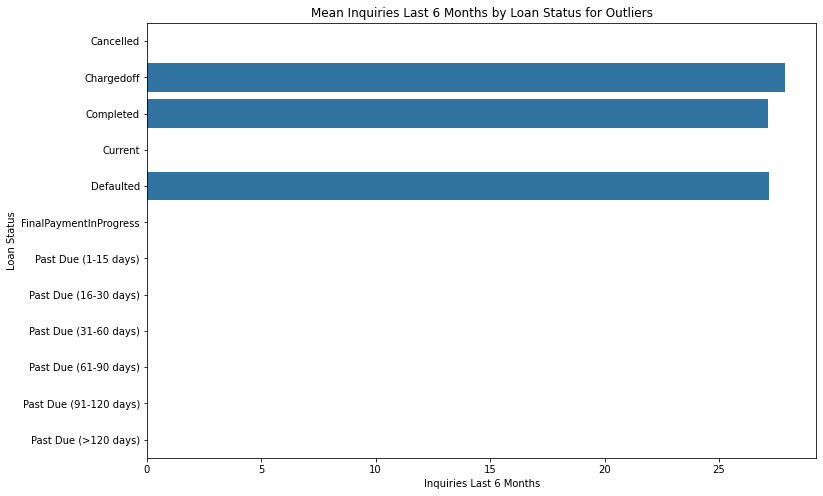

In [40]:
plt.figure(figsize = [12, 8])
base_color = sb.color_palette()[0]
plot_data = df.loc[high_outliers, :][['LoanStatus', 'InquiriesLast6Months']]
plot_data = plot_data.groupby('LoanStatus').mean().reset_index()
sb.barplot(data=plot_data, x='InquiriesLast6Months', y='LoanStatus', color=base_color)
plt.title('Mean Inquiries Last 6 Months by Loan Status for Outliers')
plt.xlabel('Inquiries Last 6 Months')
plt.ylabel('Loan Status');

Defaulted and Chargedoff loan statuses also seem to have the highest number of inquiries over the previous 6 months. This is an indication that people who have the most credit requests, tend to also have the most issue paying back the loans.

Let's investigate the deliquency outliers and see what their original Propser rating was, using the old rating score `CreditGrade` and the new rating score `ProsperRatingAlpha`

In [41]:
high_outliers =(df['CurrentDelinquencies'] > 20)
print(high_outliers.sum())
df.loc[high_outliers, :]

134


,LoanOriginalAmount,LoanStatus,IncomeRange,CreditGrade,LoanMonthsSinceOrigination,Term,BorrowerRate,ProsperRatingNumeric,ProsperRatingAlpha,ProsperScore,...,CurrentCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,CurrentDelinquencies,DelinquenciesLast7Years,PublicRecordsLast12Months,RevolvingCreditBalance,DebtToIncomeRatio
535,1700,Defaulted,Not displayed,HR,86,36,0.2355,NaN,NaN,NaN,...,NaN,27.0,0,0.0,1.0,22.0,0.0,NaN,NaN,0.03
1101,1000,Chargedoff,Not displayed,E,87,36,0.2895,NaN,NaN,NaN,...,NaN,51.0,3,154.0,6.0,21.0,26.0,NaN,NaN,0.38
1799,2780,Chargedoff,"$1-24,999",HR,67,36,0.3500,NaN,NaN,NaN,...,1.0,32.0,0,0.0,3.0,22.0,4.0,0.0,0.0,0.06
2259,1000,Chargedoff,"$1-24,999",HR,72,36,0.3500,NaN,NaN,NaN,...,1.0,37.0,0,0.0,4.0,25.0,44.0,0.0,0.0,0.08
5464,2771,Chargedoff,Not displayed,E,86,36,0.2370,NaN,NaN,NaN,...,NaN,50.0,1,20.0,0.0,21.0,30.0,NaN,NaN,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109208,15000,Current,"$50,000-74,999",NaN,3,36,0.1400,5.0,B,8.0,...,14.0,93.0,10,360.0,0.0,51.0,0.0,0.0,10715.0,0.39
109718,15000,Chargedoff,"$25,000-49,999",D,83,36,0.2280,NaN,NaN,NaN,...,2.0,68.0,1,0.0,1.0,23.0,84.0,0.0,0.0,0.56
110425,1525,Completed,Not displayed,HR,87,36,0.2195,NaN,NaN,NaN,...,NaN,32.0,0,0.0,5.0,24.0,30.0,NaN,NaN,0.02
111561,1050,Defaulted,Not displayed,HR,88,36,0.2300,NaN,NaN,NaN,...,NaN,34.0,2,20.0,0.0,28.0,0.0,NaN,NaN,0.26


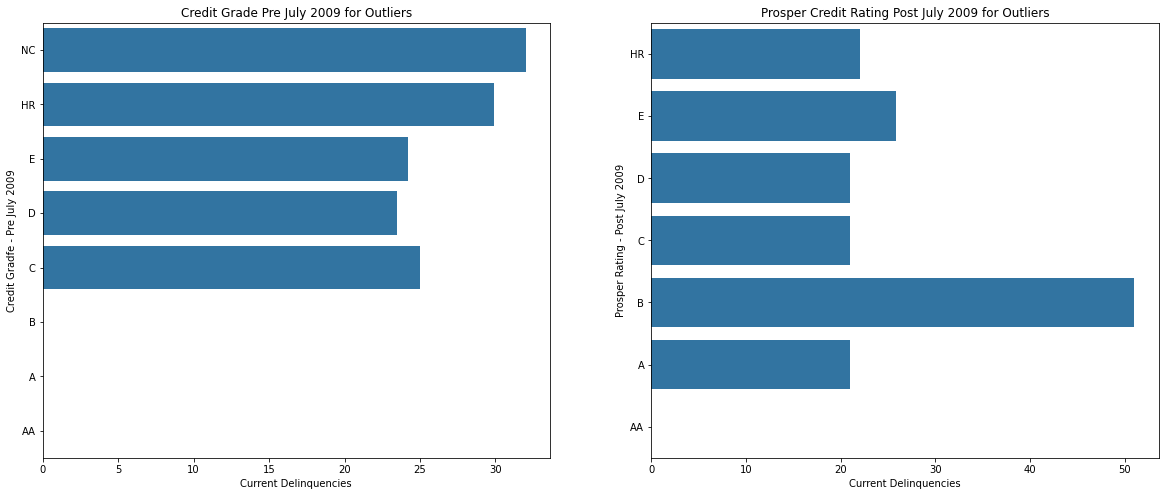

In [42]:
plt.figure(figsize = [20, 8])
base_color = sb.color_palette()[0]
plot_data = df.loc[high_outliers, :][['CreditGrade', 'ProsperRatingAlpha', 'CurrentDelinquencies']]
plot_data_credit_grade = plot_data.groupby('CreditGrade').mean().reset_index()
plot_data_prosper_rating = plot_data.groupby('ProsperRatingAlpha').mean().reset_index()

plt.subplot(1, 2, 1)
sb.barplot(data=plot_data_credit_grade, x='CurrentDelinquencies', y='CreditGrade', color=base_color)
plt.title('Credit Grade Pre July 2009 for Outliers')
plt.xlabel('Current Delinquencies')
plt.ylabel('Credit Gradfe - Pre July 2009');

plt.subplot(1, 2, 2)
sb.barplot(data=plot_data_prosper_rating, x='CurrentDelinquencies', y='ProsperRatingAlpha', color=base_color)
plt.title('Prosper Credit Rating Post July 2009 for Outliers')
plt.xlabel('Current Delinquencies')
plt.ylabel('Prosper Rating - Post July 2009');

Pre-July 2009, customers with NC and HR credit grades had the most delinquencies, while post July-2009, customers with the most delinquencies had a B credit rating

Let's investigate the income range of those customers who have the most number of delinquencies over the last 7 years

In [43]:
high_outliers = (df['DelinquenciesLast7Years'] > 40)
print(high_outliers.sum())
df.loc[high_outliers, :]

1974


,LoanOriginalAmount,LoanStatus,IncomeRange,CreditGrade,LoanMonthsSinceOrigination,Term,BorrowerRate,ProsperRatingNumeric,ProsperRatingAlpha,ProsperScore,...,CurrentCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,CurrentDelinquencies,DelinquenciesLast7Years,PublicRecordsLast12Months,RevolvingCreditBalance,DebtToIncomeRatio
32,25000,Current,"$75,000-99,999",NaN,2,36,0.1274,5.0,B,8.0,...,9.0,30.0,7,610.0,0.0,0.0,51.0,0.0,25224.0,0.22
37,5000,Current,"$25,000-49,999",NaN,6,36,0.2469,3.0,D,6.0,...,10.0,47.0,6,248.0,0.0,0.0,52.0,0.0,8672.0,0.31
55,10000,Current,"$25,000-49,999",NaN,4,36,0.1399,5.0,B,7.0,...,9.0,57.0,13,388.0,0.0,0.0,42.0,0.0,9037.0,0.22
61,2000,Current,"$75,000-99,999",NaN,3,36,0.1274,5.0,B,8.0,...,6.0,62.0,6,76.0,4.0,20.0,72.0,0.0,414.0,0.03
73,4000,Current,"$50,000-74,999",NaN,8,36,0.2272,3.0,D,3.0,...,7.0,34.0,2,53.0,1.0,3.0,64.0,0.0,408.0,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113743,5000,Current,"$25,000-49,999",NaN,2,60,0.2150,3.0,D,3.0,...,10.0,31.0,7,251.0,5.0,0.0,41.0,0.0,4600.0,0.31
113804,5000,Completed,"$100,000+",D,73,36,0.2500,NaN,NaN,NaN,...,6.0,61.0,3,43.0,3.0,23.0,62.0,0.0,844.0,0.09
113853,3400,Completed,"$25,000-49,999",D,75,36,0.3397,NaN,NaN,NaN,...,5.0,16.0,5,70.0,2.0,2.0,42.0,0.0,597.0,0.07
113875,5000,Past Due (61-90 days),"$50,000-74,999",NaN,28,36,0.3149,2.0,E,4.0,...,15.0,46.0,11,162.0,0.0,6.0,41.0,0.0,4251.0,0.19


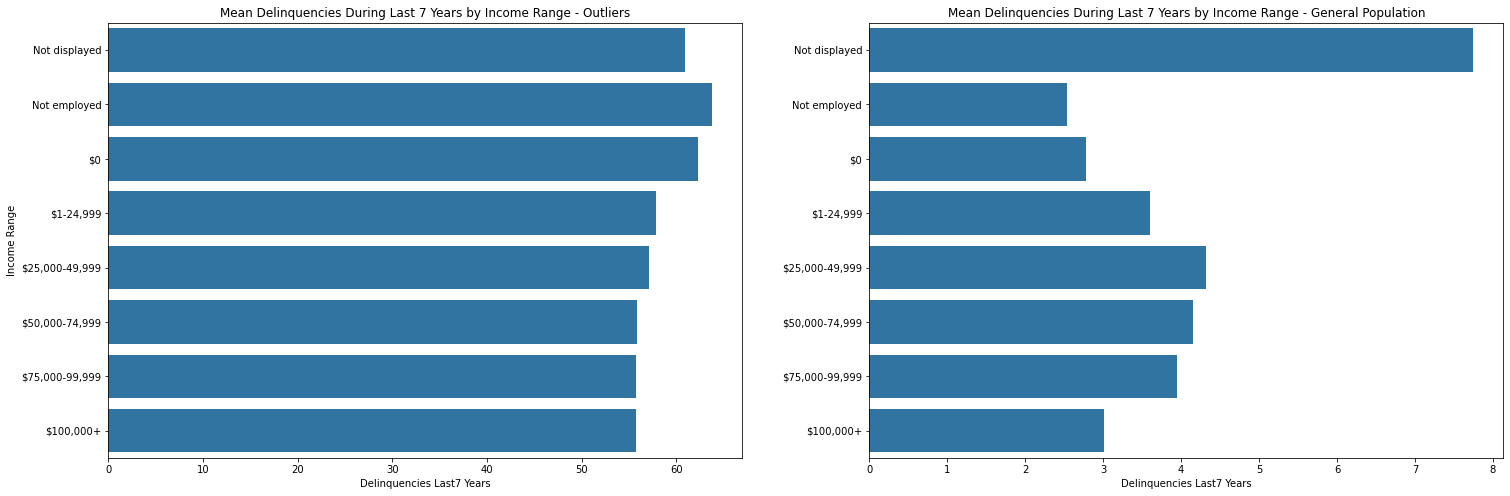

In [44]:
# will plot the outliers side-by-side with the general population
plt.figure(figsize = [25, 8])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
plot_data = df.loc[high_outliers, :][['IncomeRange', 'DelinquenciesLast7Years']]
plot_data = plot_data.groupby('IncomeRange').mean().reset_index()
sb.barplot(data=plot_data, x='DelinquenciesLast7Years', y='IncomeRange', color=base_color)
plt.title('Mean Delinquencies During Last 7 Years by Income Range - Outliers')
plt.xlabel('Delinquencies Last7 Years')
plt.ylabel('Income Range');

plt.subplot(1, 2, 2)
plot_data = df[['IncomeRange', 'DelinquenciesLast7Years']]
plot_data = plot_data.groupby('IncomeRange').mean().reset_index()
sb.barplot(data=plot_data, x='DelinquenciesLast7Years', y='IncomeRange', color=base_color)
plt.title('Mean Delinquencies During Last 7 Years by Income Range - General Population')
plt.xlabel('Delinquencies Last7 Years');
plt.ylabel('');

For the outliers, we can see that those not employed or having \\$0 salary have the most delinquences during the last 7 years, however its clear from the outliers and general population that we have a large number of customers who have delinquences but whose income range we do not know, i.e. `Not Displayed`

In [45]:
high_outliers = (df['PublicRecordsLast12Months'] > 3)
print(high_outliers.sum())
df.loc[high_outliers, :]

13


,LoanOriginalAmount,LoanStatus,IncomeRange,CreditGrade,LoanMonthsSinceOrigination,Term,BorrowerRate,ProsperRatingNumeric,ProsperRatingAlpha,ProsperScore,...,CurrentCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,CurrentDelinquencies,DelinquenciesLast7Years,PublicRecordsLast12Months,RevolvingCreditBalance,DebtToIncomeRatio
20857,1000,Chargedoff,"$25,000-49,999",HR,69,36,0.2200,NaN,NaN,NaN,...,1.0,5.0,0,0.0,0.0,1.0,0.0,7.0,0.0,0.14
27637,20000,Current,"$75,000-99,999",NaN,12,36,0.0974,6.0,A,7.0,...,19.0,46.0,14,776.0,0.0,0.0,0.0,4.0,46273.0,0.22
32291,2500,Completed,"$50,000-74,999",E,67,36,0.3045,NaN,NaN,NaN,...,2.0,11.0,2,31.0,1.0,3.0,7.0,4.0,769.0,0.11
36399,2400,Chargedoff,"$25,000-49,999",HR,81,36,0.2900,NaN,NaN,NaN,...,7.0,31.0,4,66.0,5.0,11.0,22.0,4.0,260.0,0.12
38301,12500,Chargedoff,"$25,000-49,999",NaN,21,36,0.2287,3.0,D,2.0,...,7.0,12.0,5,342.0,2.0,0.0,0.0,4.0,23831.0,0.50
39091,5000,Defaulted,"$100,000+",NaN,31,36,0.3099,2.0,E,4.0,...,10.0,25.0,7,230.0,0.0,5.0,15.0,4.0,7151.0,0.19
48338,9500,Current,"$100,000+",NaN,9,60,0.1984,4.0,C,5.0,...,8.0,18.0,6,778.0,0.0,0.0,0.0,20.0,139053.0,NaN
55456,20000,Current,"$100,000+",NaN,11,12,0.1109,5.0,B,7.0,...,12.0,31.0,8,413.0,0.0,0.0,0.0,4.0,25847.0,0.35
64314,3000,Completed,"$25,000-49,999",C,70,36,0.1600,NaN,NaN,NaN,...,6.0,48.0,6,138.0,5.0,0.0,29.0,4.0,3995.0,0.34
79778,4000,Completed,"$75,000-99,999",C,75,36,0.2203,NaN,NaN,NaN,...,5.0,20.0,2,128.0,8.0,1.0,17.0,4.0,3620.0,0.15


In [46]:
high_outliers = (df['RevolvingCreditBalance'] > 100000)
print(high_outliers.sum())
df.loc[high_outliers, :]

2351


,LoanOriginalAmount,LoanStatus,IncomeRange,CreditGrade,LoanMonthsSinceOrigination,Term,BorrowerRate,ProsperRatingNumeric,ProsperRatingAlpha,ProsperScore,...,CurrentCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,CurrentDelinquencies,DelinquenciesLast7Years,PublicRecordsLast12Months,RevolvingCreditBalance,DebtToIncomeRatio
36,10000,Current,"$100,000+",NaN,3,36,0.2850,2.0,E,2.0,...,12.0,34.0,10,757.0,3.0,0.0,12.0,0.0,103263.0,0.14
48,15000,Current,"$100,000+",NaN,7,60,0.1519,5.0,B,6.0,...,19.0,41.0,7,846.0,0.0,0.0,0.0,0.0,153812.0,0.25
116,15000,Current,"$75,000-99,999",NaN,5,60,0.1760,4.0,C,6.0,...,21.0,47.0,17,1861.0,1.0,0.0,0.0,0.0,241819.0,0.33
226,1000,Completed,Not displayed,D,84,36,0.1000,NaN,NaN,NaN,...,30.0,47.0,23,2866.0,5.0,0.0,0.0,0.0,152934.0,10.01
246,15000,Current,"$100,000+",NaN,12,60,0.2259,4.0,C,4.0,...,16.0,37.0,9,1295.0,0.0,1.0,13.0,0.0,112680.0,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113561,14000,Current,"$100,000+",NaN,6,60,0.1730,4.0,C,7.0,...,17.0,27.0,14,2388.0,0.0,0.0,0.0,0.0,184419.0,0.20
113592,5500,Completed,"$75,000-99,999",A,76,36,0.0825,NaN,NaN,NaN,...,20.0,33.0,12,1876.0,4.0,0.0,0.0,0.0,136070.0,0.30
113784,15000,Current,"$100,000+",NaN,4,36,0.0990,6.0,A,11.0,...,10.0,48.0,7,954.0,0.0,0.0,0.0,0.0,105680.0,0.30
113796,25000,Current,"$100,000+",NaN,1,36,0.0930,6.0,A,10.0,...,19.0,51.0,15,1301.0,0.0,0.0,0.0,0.0,171041.0,0.19


In [47]:
high_outliers = (df['DebtToIncomeRatio'] > 3)
print(high_outliers.sum())
df.loc[high_outliers, :]

409


,LoanOriginalAmount,LoanStatus,IncomeRange,CreditGrade,LoanMonthsSinceOrigination,Term,BorrowerRate,ProsperRatingNumeric,ProsperRatingAlpha,ProsperScore,...,CurrentCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,CurrentDelinquencies,DelinquenciesLast7Years,PublicRecordsLast12Months,RevolvingCreditBalance,DebtToIncomeRatio
22,4000,Current,"$1-24,999",NaN,13,36,0.3134,1.0,HR,2.0,...,9.0,18.0,8,617.0,0.0,0.0,0.0,0.0,10050.0,9.20
226,1000,Completed,Not displayed,D,84,36,0.1000,NaN,NaN,NaN,...,30.0,47.0,23,2866.0,5.0,0.0,0.0,0.0,152934.0,10.01
576,1500,Completed,"$1-24,999",AA,83,36,0.0935,NaN,NaN,NaN,...,9.0,13.0,11,42.0,0.0,0.0,0.0,0.0,1772.0,10.01
626,2000,Current,"$1-24,999",NaN,25,36,0.3177,1.0,HR,4.0,...,6.0,20.0,3,123.0,0.0,1.0,0.0,0.0,4445.0,10.01
1242,3000,Completed,Not employed,A,81,36,0.1072,NaN,NaN,NaN,...,6.0,12.0,5,165.0,0.0,0.0,0.0,0.0,5932.0,10.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112712,2850,Chargedoff,"$1-24,999",D,74,36,0.2400,NaN,NaN,NaN,...,1.0,3.0,0,0.0,1.0,0.0,0.0,0.0,0.0,10.01
112719,6250,Completed,"$1-24,999",E,82,36,0.2450,NaN,NaN,NaN,...,27.0,68.0,19,979.0,9.0,0.0,0.0,0.0,30707.0,4.86
113099,2000,Current,"$1-24,999",NaN,8,36,0.2932,2.0,E,3.0,...,5.0,16.0,4,235.0,0.0,0.0,0.0,0.0,9575.0,10.01
113258,4000,Defaulted,"$1-24,999",NaN,19,60,0.2498,4.0,C,6.0,...,9.0,23.0,8,219.0,0.0,0.0,9.0,0.0,10742.0,10.01


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The majority of loans are in Current or Completed, with ChargedOff and Defaulted being the next major statuses. Being ordinal categorical variables, no transformations were needed. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

For loan amounts, we saw spikes around each multiple of 5K, these are probably standard loan offerings. The distribution is also right-skewed, meaning there are some outliers. Most loans are are for individuals earning between $25,000 - $49,999, followed by $50,000 - $74,999. Other and Professional are the most common, which are likely just "catch-all" categories, this doesnt give us much info. Interestingly though, Computer Programmers are the most common "non-generic" listed profession. Most types of students form the bottom 10 listed professions, as one might expect. Most people are employed and probably are full-time employed. Looks like C was the most common rating pre and post July 2009, however there is a shift between D and B scores between both periods. Its not clear though what that means since we don't know what goes into the credit decision score itself. Loan terms seem to be offered in 3 values - 12, 36 or 60 months, which 36 months being most common. Prosper Rating and Score of 4 is most common. Prosper score of 6 and 8 is also quite common.
Most people do not have any delinquincies, revolving credit monthly payments, public records or inquiries in the last 6 months. For those with a very large number of open credit lines, it could indicate a lot of debt. In turn, they also have a large revolving credit balance as one might expect. It seems that credit rules changed after July 2009 and certain people who would have received credit prior to this point, would no longer be eligible after.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

As our goal is to understand the variables are a factor in a loan's outcome status, we should explore a few relationships between loan status and some of the variables mentioned previously. 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   LoanOriginalAmount           113937 non-null  int64   
 1   LoanStatus                   113937 non-null  category
 2   IncomeRange                  113937 non-null  category
 3   CreditGrade                  28953 non-null   category
 4   LoanMonthsSinceOrigination   113937 non-null  int64   
 5   Term                         113937 non-null  int64   
 6   BorrowerRate                 113937 non-null  float64 
 7   ProsperRatingNumeric         84853 non-null   float64 
 8   ProsperRatingAlpha           84853 non-null   category
 9   ProsperScore                 84853 non-null   float64 
 10  ListingCategoryNumeric       113937 non-null  category
 11  Occupation                   110349 non-null  category
 12  EmploymentStatus             111682 non-null

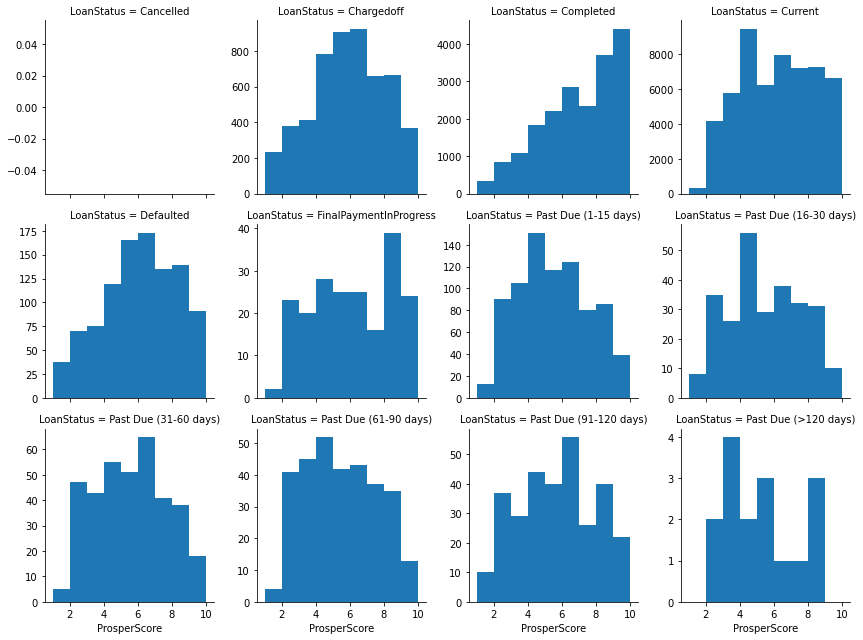

In [49]:
#facet plot - prosper score by loan status
bin_edges = np.arange(1, 10+1, 1)
g = sb.FacetGrid(data = df, col = 'LoanStatus', col_wrap=4, dropna=True, sharey=False)
g.map(plt.hist, "ProsperScore", bins = bin_edges);

Most customers with completed loans, have a prosper score of 10, while most that default or have charge offs, have a score around 5 or 6. 

Let's now see if there is a correlation between the length of time the loan is held for and the loan status

ValueError: autodetected range of [nan, nan] is not finite

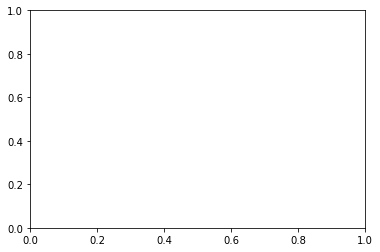

In [50]:
plt.hist2d(data = df, x = 'LoanMonthsSinceOrigination', y = 'InquiriesLast6Months', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

